## Avaliando a performance de algoritmos de aprendizado

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Leitura do Dataset
arq = '../input/pima-indians-diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataset = pd.read_csv(arq, header=None, names=col_names)

In [3]:
dataset.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Seleciono features de interesse
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = dataset[feature_cols]
y = dataset.label

In [5]:
# Divido X e Y em conjuntos de testes e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# Treinamos um modelo de regressão logistica com nosso conjunto de treino
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# Predita o conjunto de teste e salva as repostas em um vetor
y_pred_class = logreg.predict(X_test)

## Calculamos a acurácia
Porcentagem de predições corretas

In [8]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


## Matriz de Confusão

In [9]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


 ### Terminologia
 
* True Positives (TP): Nós previmos corretamente que eles têm diabetes
* True Negatives (TN): Nós previmos corretamente que eles não possuem diabetes
* False Positives (FP): Nós previmos incorretamente que eles tem diabetes (também chamado de  "Tipo de erro I")
* False Negatives (FN): Nós previmos incorretamente que eles não tem diabates (também chamado de  "Tipo de erro II")

In [10]:
# imprimo os 10 primeiros rótulos reais e os previstos
print('Real:', y_test.values[0:10])
print('Pred:', y_pred_class[0:10])

Real: [1 0 0 1 0 0 1 1 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1]


In [11]:
# podemos salvar a matriz e dividi-la em 4 partes:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Métricas extraídas da matriz de confusão

 #### Acurácia da classificação:  Com que frequência meu classificador está correto?

In [12]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


 #### Erro da classificação:  Com que frequência meu classificador está inccorreto?

In [13]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


 #### Sensibilidade:  Dado valor é verdadeiro, quantas vezes a predição está correta?
 - Também conhecida como revocação ("recall")

In [14]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


 #### Especificidade:  Dado valor é negativo, quantas vezes a predição está correta?
 - Quão especifico e seletivo é o  classificador na prediçao de instâncias positivas?  

In [15]:
print(TN / float(TN + FP))

0.9076923076923077


 #### Taxa dos Falsos Negativos:  Dado valor é negativo, quantas vezes a predição está incorreta?  

In [16]:
print(FP / float(TN + FP))

0.09230769230769231


 #### Precisão:  Quando um valor positivo é previsto, com que frequência a predição está correta?  
 - O quão preciso meu classificador é quando faz a predição de instâncias positivas?

In [17]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


## K-fold CrossValidation

In [34]:
from sklearn.model_selection import cross_val_score
cols = list(dataset.columns)
cols.pop(-1)

'label'

In [38]:
scores = cross_val_score(logreg, dataset[cols], dataset.label, cv=10, scoring='accuracy')
print(scores)

[0.74025974 0.75324675 0.79220779 0.72727273 0.74025974 0.74025974
 0.81818182 0.79220779 0.73684211 0.82894737]


In [39]:
# usar a precisão média como uma estimativa da precisão
print(scores.mean())

0.7669685577580314


## Aumentando o desempenho por ajustes no threshold de classificação

In [19]:
# imprime as primeiras 10 respostas preditas
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [20]:
# imprima as primeiras 10 probabilidades previstas de associação de classe
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [21]:
# imprima as primeiras 10 probabilidades previstas para a classe 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [22]:
# salva probabilidades previstas para a classe 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [23]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequência')

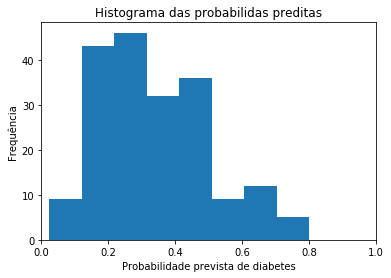

In [24]:

# histograma das probabilidas preditas
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histograma das probabilidas preditas')
plt.xlabel('Probabilidade prevista de diabetes')
plt.ylabel('Frequência')

Diminuir o threshold de previsão de diabetes para aumentar a sensibilidade do classificador

In [25]:
# prever diabetes se a probabilidade prevista for maior que 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [26]:
# imprime as 10 primeiras probabilidades preditas
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [27]:

# imprime as primeiras 10 classes previstas com o limite inferior
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [28]:
# Matriz de confusão anterior (threshold de 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [29]:
# nova matriz de confusão(threshold de 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [30]:
# sensibilidade aumentou (costumava ser 0.24)
print(46 / float(46 + 16))

0.7419354838709677


In [31]:
# especificidade diminiu (costumava ser 0.91)
print(80 / float(80 + 50))

0.6153846153846154


**Conclusão:**

* O limite de 0,5 é usado por padrão (para problemas binários) para converter probabilidades previstas em previsões de classe
* O limiar pode ser ajustado para aumentar a sensibilidade ou especificidade
* Sensibilidade e especificidade têm uma relação inversa

## Curvas ROC e área sobre a curva(AUC)

##### Não seria legal se pudéssemos ver como a sensibilidade e a especificidade são afetadas por vários thresholds, sem realmente alterar o threshold?

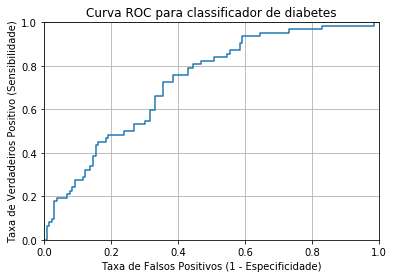

In [32]:
# IMPORTANTE: primeiro argumento são os valores verdadeiros e segundo argumento são as probabilidades previstas
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para classificador de diabetes')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivo (Sensibilidade)')
plt.grid(True)

* A curva ROC pode ajudá-lo a escolher um threshold que equilibre a sensibilidade e a especificidade de uma forma que faça sentido para o seu contexto particular.